In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import nltk
from nltk.tokenize import RegexpTokenizer
# nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
sns.set()

In [626]:
#Data import and creation of dataframe
file_ = '/Users/alexevenson/Library/Mobile Documents/com~apple~CloudDocs/DSS Hackathon/Dataset 1 (SHORTENED).csv'
df = pd.read_csv(file_)

#Stream data to credit cases only, Display data from the dataframe
df = df[df['Product'].str.contains("redit")]
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Credit card,NaN,Billing statement,NaN,NaN,NaN,Citibank,OH,45247,NaN,NaN,Referral,07/30/2013,Closed with explanation,Yes,Yes,469026
1,07/29/2013,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,Synchrony Financial,WA,98548,NaN,NaN,Web,07/29/2013,Closed with monetary relief,Yes,No,469131
2,07/29/2013,Credit card,NaN,Delinquent account,NaN,NaN,NaN,Amex,TX,78232,NaN,NaN,Web,07/29/2013,Closed with monetary relief,Yes,No,479990
3,07/29/2013,Credit card,NaN,Billing disputes,NaN,NaN,NaN,Capital One,FL,32226,Servicemember,NaN,Web,07/29/2013,Closed with explanation,Yes,No,475777
4,07/29/2013,Credit card,NaN,Credit line increase/decrease,NaN,NaN,NaN,Citibank,WI,53066,Older American,NaN,Phone,07/30/2013,Closed with explanation,Yes,Yes,469473


In [627]:
#Inspect unique data from the issues and product fields
def get_uniques(column_name):
    return df[column_name].unique()
for i in df.columns:
    print(i)
    print(get_uniques(i))

Date received
['07/29/2013' '07/30/2013' '07/31/2013' ... '10/22/2016' '11/13/2016'
 '11/05/2016']
Product
['Credit card']
Sub-product
[nan]
Issue
['Billing statement' 'APR or interest rate' 'Delinquent account'
 'Billing disputes' 'Credit line increase/decrease' 'Payoff process'
 'Closing/Cancelling account' 'Credit determination'
 'Identity theft / Fraud / Embezzlement' 'Transaction issue'
 'Balance transfer fee' 'Late fee' 'Advertising and marketing'
 'Credit card protection / Debt protection' 'Application processing delay'
 'Other' 'Customer service / Customer relations' 'Cash advance'
 'Unsolicited issuance of credit card' 'Privacy' 'Bankruptcy'
 'Convenience checks' 'Other fee' 'Balance transfer' 'Overlimit fee'
 'Forbearance / Workout plans' 'Rewards' 'Arbitration' 'Cash advance fee'
 'Sale of account' 'Credit reporting' 'Collection practices'
 'Collection debt dispute']
Sub-issue
[nan]
Consumer complaint narrative
[nan
 'Received Capital One charge card offer XXXX. Applied, was

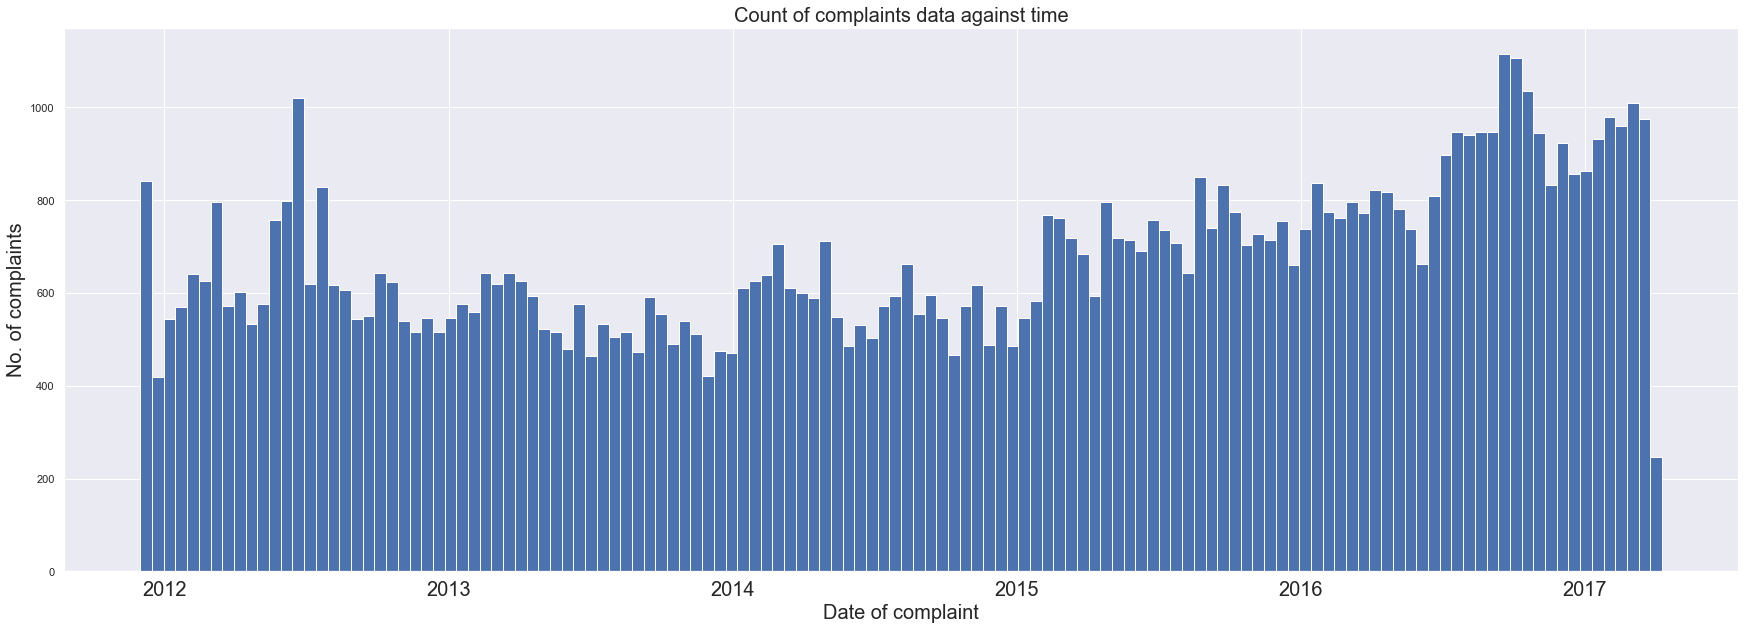

In [615]:
#Set df field to datetime objects
dates = pd.to_datetime(df['Date received']);

#Create a histogram of dates
plt.figure(figsize=(30,10))
plt.hist(dates, bins = 130)

plt.xticks(size=20)
plt.xlabel('Date of complaint', size=20)
plt.ylabel('No. of complaints', size=20)
plt.title('Count of complaints data against time', size=20)

plt.savefig('Count of complaint dates.pdf', size=20)

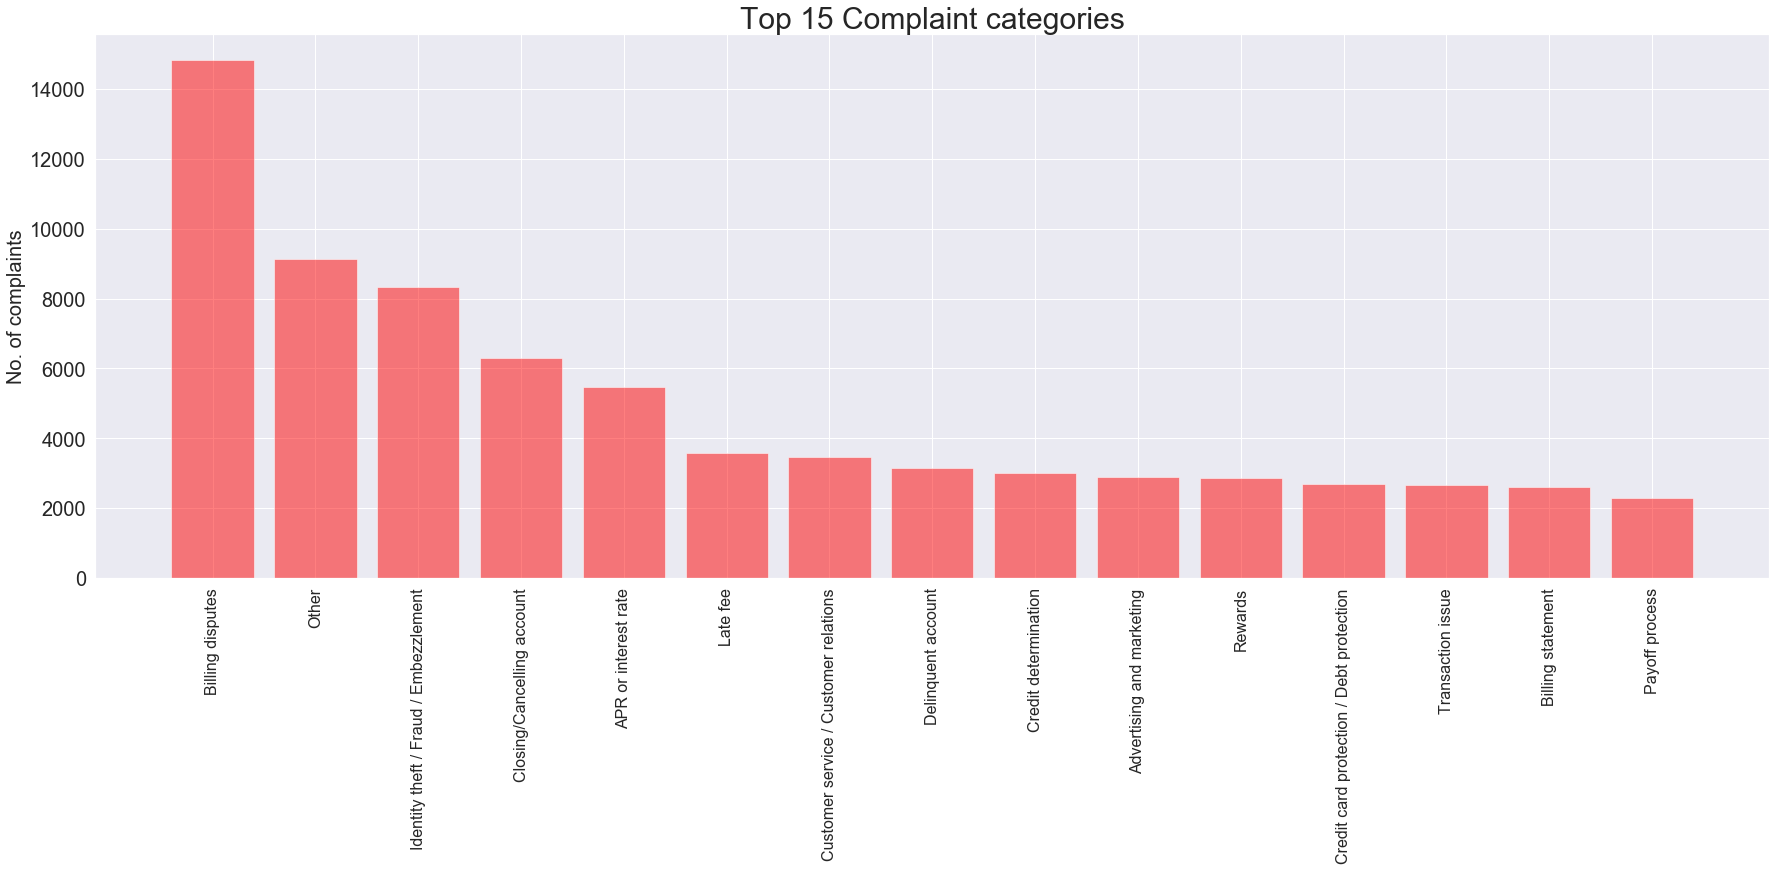

Billing disputes                            1110.0
Other                                        624.0
Identity theft / Fraud / Embezzlement        464.0
Closing/Cancelling account                   466.0
APR or interest rate                         239.0
Late fee                                     195.0
Customer service / Customer relations        295.0
Delinquent account                           145.0
Credit determination                         208.0
Advertising and marketing                    436.0
Rewards                                      820.0
Credit card protection / Debt protection       NaN
Transaction issue                            241.0
Billing statement                            167.0
Payoff process                                 NaN
Name: Issue, dtype: float64

In [634]:
#Create a plot of complaint frequiencies for the top fifteen categories  by count
Issue_data = df['Issue'].value_counts()[:15]

#Split series into objects and values to pass to matplotlib, set y_pos for each bar
objects = Issue_data.keys()
y_pos = np.arange(len(objects))
values_counts = list(Issue_data.values)

#Create matplotlib graph
plt.figure(figsize=(30,10))
plt.bar(y_pos, values_counts, align='center', alpha=0.5, color='red')
plt.xticks(y_pos, objects, size=16)
plt.yticks(size=20)
plt.ylabel('No. of complaints', size=20)
plt.title('Top 15 Complaint categories', size=30)
plt.xticks(rotation=90)

#Save figure in current drive and show
plt.savefig('Complaint frequencies.pdf')
plt.show()

Issue_data.keys()
amex_issue_data = amex_issue_data[Issue_data.keys()]

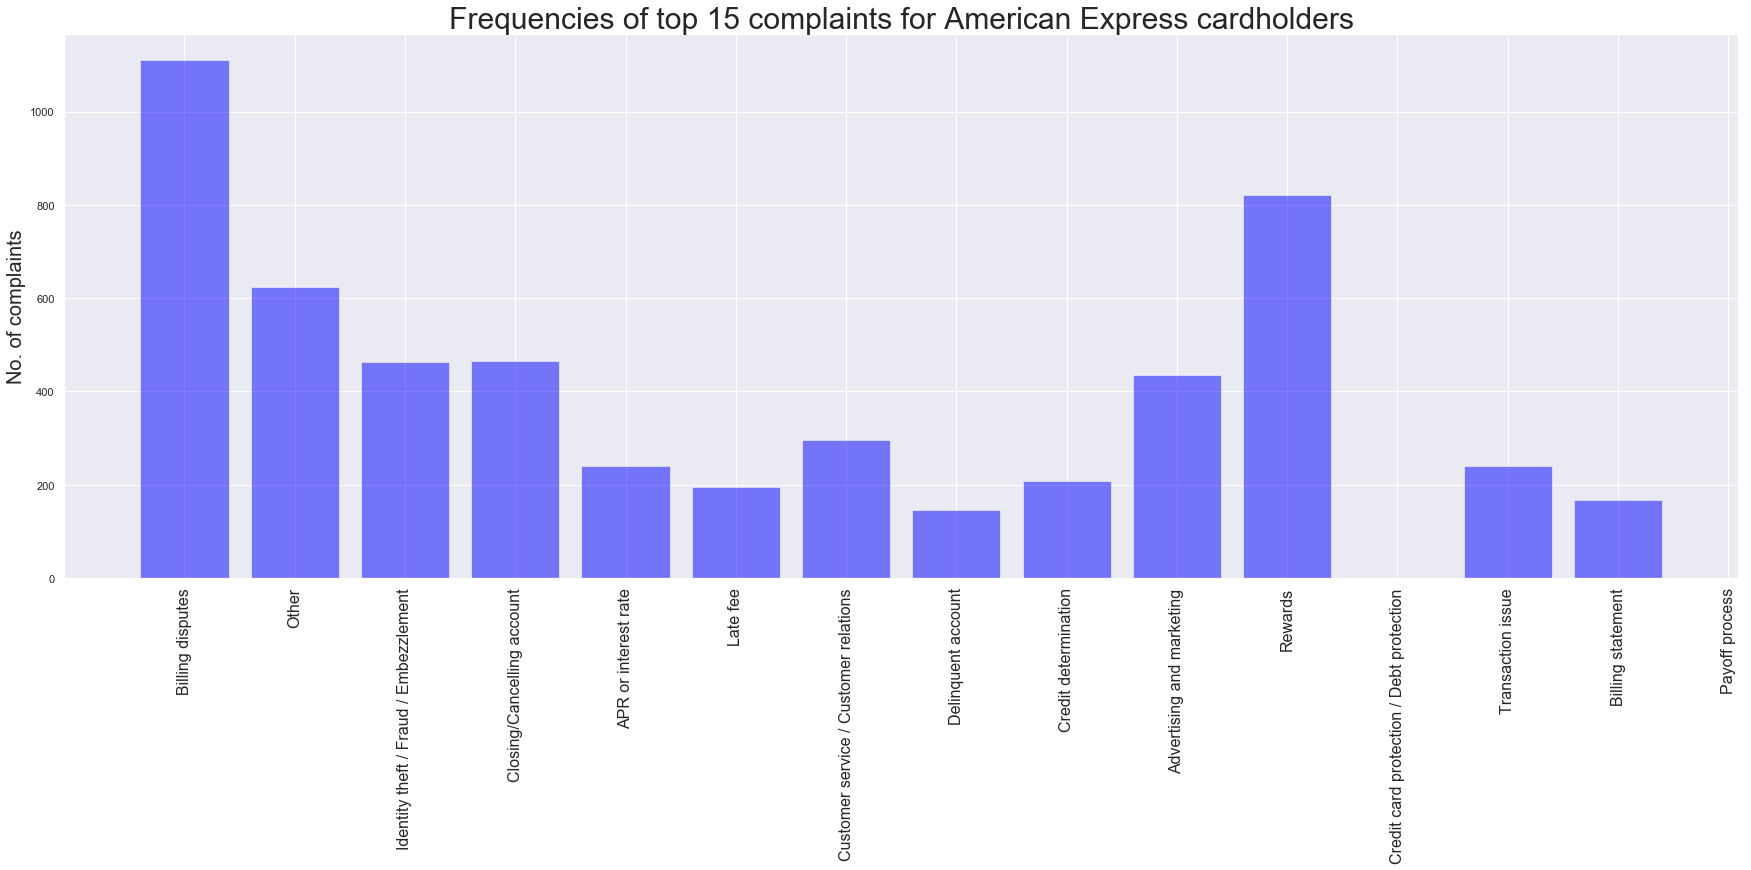

Billing disputes                            1110.0
Other                                        624.0
Identity theft / Fraud / Embezzlement        464.0
Closing/Cancelling account                   466.0
APR or interest rate                         239.0
Late fee                                     195.0
Customer service / Customer relations        295.0
Delinquent account                           145.0
Credit determination                         208.0
Advertising and marketing                    436.0
Rewards                                      820.0
Credit card protection / Debt protection       0.0
Transaction issue                            241.0
Billing statement                            167.0
Payoff process                                 NaN
Name: Issue, dtype: float64

In [647]:
#Filter data into AMEX only complaints, get counts for top fifteen values
amex_df = df[df['Company'] == 'Amex']
amex_issue_data = amex_df['Issue'].value_counts()[:15]

amex_issue_data = amex_issue_data[Issue_data.keys()]

#Split series into objects and values to pass to matplotlib, set y_pos for each bar
objects = amex_issue_data.keys()
y_pos = np.arange(len(objects))
values_counts = list(amex_issue_data.values)

#Create matplotlib graph
plt.figure(figsize=(30,10))
plt.bar(y_pos, values_counts, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects, size=16)
plt.ylabel('No. of complaints', size=20)
plt.title('Frequencies of top 15 complaints for American Express cardholders', size=30)
plt.xticks(rotation=90)

#Save figure in current drive and show
plt.savefig('Complaint frequencies.pdf')
plt.show()

for i in range(len(amex_issue_data)):
    if amex_issue_data[i] == np.nan:
        amex_issue_data[i] = 0

amex_issue_data[11] = 0

amex_issue_data[14] = 0

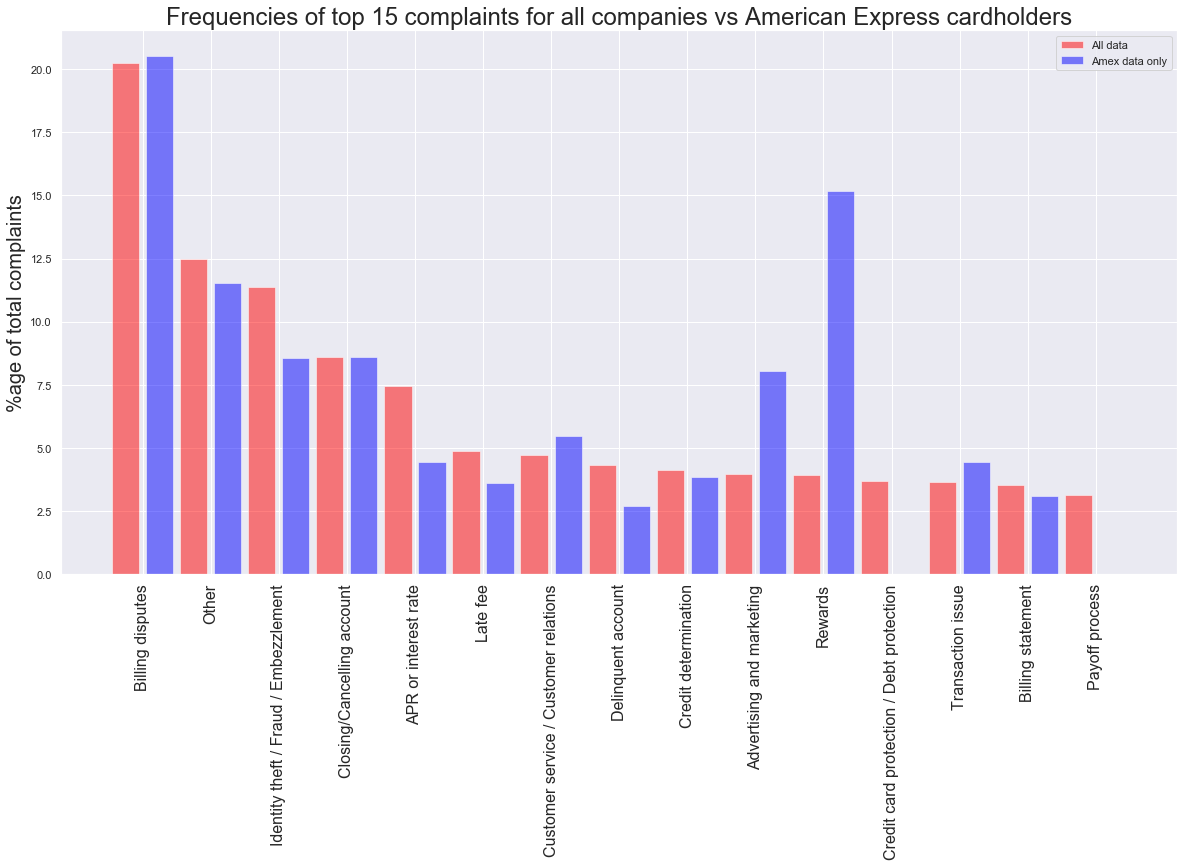

In [651]:
#Normalise data for general complaints and amex-only complaints
amex_issue_data[11] = 0
amex_issue_data[14] = 0
normalied_iss = Issue_data.values * 100 / sum(Issue_data.values)
normalised_amex_iss = amex_issue_data.values * 100 / sum(amex_issue_data.values)

#Create matplotlib figure
plt.figure(figsize=(20,10))
plt.bar(y_pos - 0.25, normalied_iss, align='center', alpha=0.5, color='red', width = 0.4)
plt.bar(y_pos + 0.25, normalised_amex_iss, align='center', alpha=0.5, color='blue', width = 0.4)
plt.xticks(y_pos, objects, size=16)
plt.ylabel('%age of total complaints', size=20)
plt.title('Frequencies of top 15 complaints for all companies vs American Express cardholders', size=24)
plt.xticks(rotation=90)
plt.legend(['All data', 'Amex data only'],loc=1)

#Save figure in current drive and show
plt.savefig('Frequencies of top 15 complaints for all companies vs American Express cardholders v2.png')
plt.show()

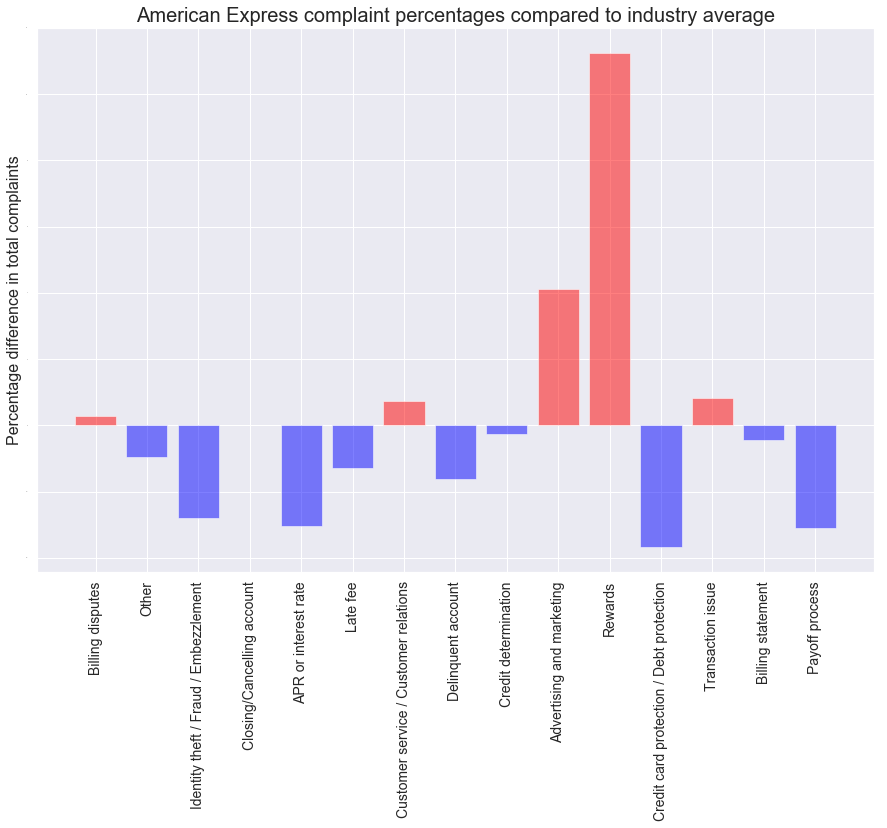

In [650]:
#Calculate difference for each complaint
difference = normalised_amex_iss - normalied_iss

#Set colourarray 
colarray = ['red' if i > 0 else 'blue' for i in difference]

#Plot matplotlib graph
plt.figure(figsize=(15,10))
plt.bar(y_pos, difference, align='center', alpha=0.5, color=colarray, width = 0.8)
plt.xticks(y_pos, objects, size=14)
plt.ylabel('Percentage difference in total complaints', size=16)
plt.yticks(size=1)
plt.title('American Express complaint percentages compared to industry average', size=20)
plt.xticks(rotation=90)

#Save figure in current drive and show
plt.savefig('AMEX vs all issue comparison data.png')
plt.show()

In [623]:
#Create seperate dataframe for reward based complaints only
reward_df = df[df['Issue'] == "Rewards"]
reward_nos = reward_df['Company'].value_counts().values

#Use the companies in the reward dataframe to create a streamed version of the normal dataframe
companies_represented = list(reward_df['Company'].unique())
streamed_df = df[df['Company'].isin(companies_represented)]
general_nos = streamed_df['Company'].value_counts().values

# Create value counts for reward only complaints and all complaints 
reward_only = pd.DataFrame(reward_df['Company'].value_counts())
general = pd.DataFrame(streamed_df['Company'].value_counts())

# Merge the two tables together for the top ten companies by count
joined_table = reward_only.merge(general, how='left', left_index=True, right_index=True)
joined_table = joined_table.iloc[0:10]
joined_table.columns = ['Reward complaints', 'Total complaints']

#Create new columns for percentages of complaints that are in certain area
joined_table['Percentage of reward complaints'] = joined_table['Reward complaints'] * 100 / joined_table['Total complaints']
joined_table['Normalised percentage of reward complaints'] = joined_table['Percentage of reward complaints']*100 / sum(joined_table['Percentage of reward complaints'])

#Get individual values from the joined table to use for po
objects = joined_table['Percentage of reward complaints'].index
values = joined_table['Percentage of reward complaints'].values

#Take averages for creating the y-line of average industry rate
industry_average_without_amex = np.mean(values[1:])

# Shorten some company names to make the graph display
joined_table['Companies'] = joined_table.index
company_names = list(joined_table['Companies'])
company_names[2] = 'JP Morgan'
company_names[8] = 'Wells Fargo'
joined_table['Companies'] = company_names


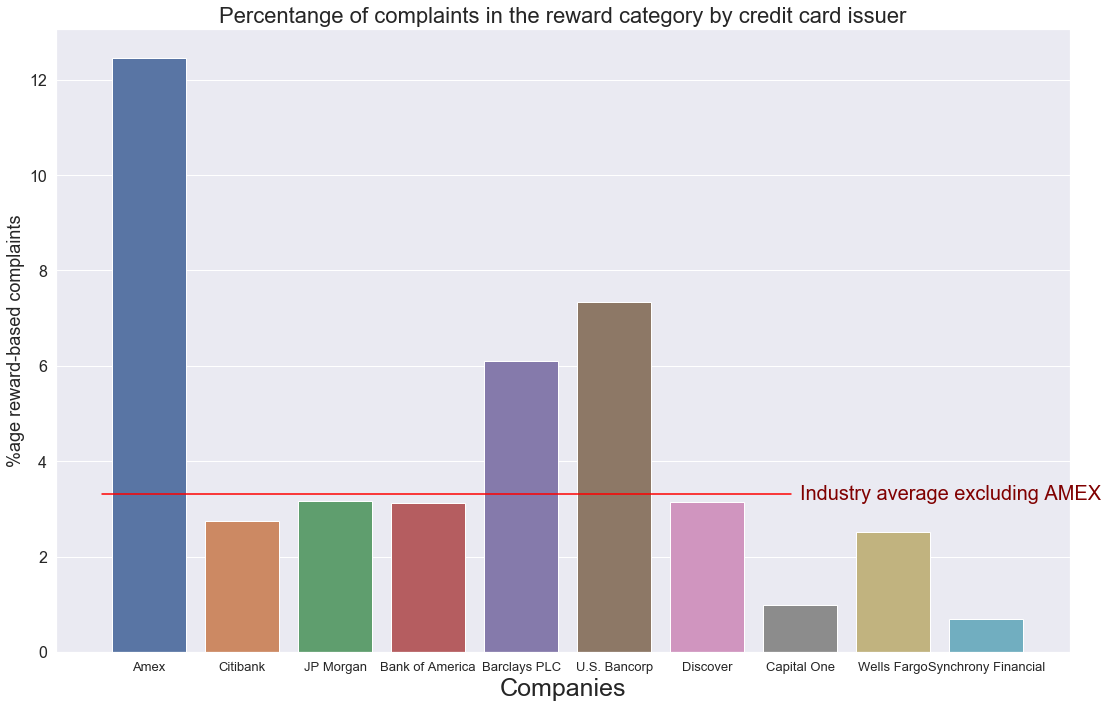

In [629]:
# Set figure size and seaborn parameters
rcParams['figure.figsize'] = 16,10
sns.set_style("darkgrid")
sns.grid = False 

#Plot bar chart and industry average line
sns.barplot(data = joined_table.reset_index(), x = 'Companies', y = 'Percentage of reward complaints')
sns.lineplot(x=[-0.5,6.9], y =[industry_average_without_amex,industry_average_without_amex], color='red')

#Set graph params
plt.title('Percentange of complaints in the reward category by credit card issuer',size=22)
plt.xticks(rotation=0, size=13)

#Add text to the red lime
plt.text(7, 3.2, "Industry average excluding AMEX", color='maroon', size=20)

#Final graph params
plt.xlabel('Companies', size =25)
plt.yticks(size=16)
plt.ylabel('%age reward-based complaints', size =18)
plt.tight_layout()

#Save graph
plt.savefig('Reward complaint comparison v2.png')

In [518]:
#Stream reward df to AMEX entries only
amex_reward_df = reward_df[reward_df['Company']=='Amex']

#Get complaints from all text, ignore the first value (NaN) and join
text = amex_reward_df['Consumer complaint narrative'].unique()
text = list(text)[1:]
corpus = " ".join(text)

#Lowercase all text and tokenize using nltk regex for words of four letters or more only
corpus = corpus.lower()
tokenizer = RegexpTokenizer(r'[a-zA-Z][a-zA-Z][a-zA-Z][a-zA-Z]+')
tokens = tokenizer.tokenize(corpus)

#Remove stop words from token set
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

#Remove specific problem words from token set
remove_word = ['xxxx', "amex", "express", "american", 'card', 'credit']
for token in tokens:
    if token in remove_word:
        clean_tokens.remove(token)
        
#Create a frequency dictionary of word entries
freq = nltk.FreqDist(clean_tokens)

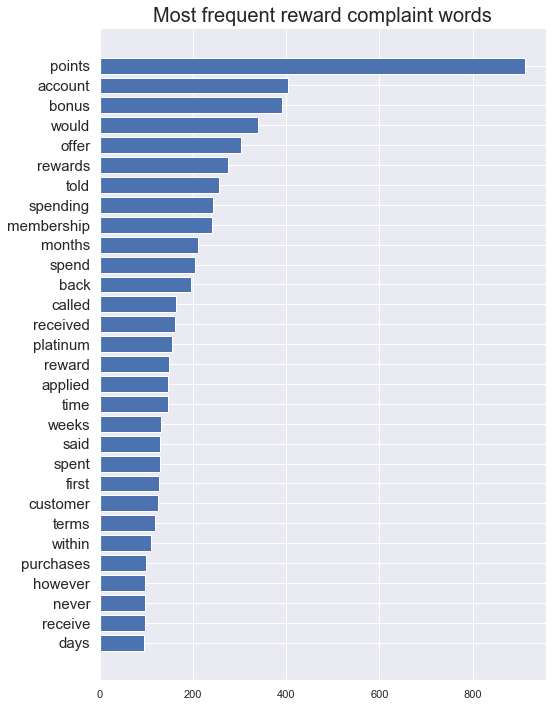

In [589]:
#Create a datafram of freqdist entries to sort and take the top 30 values ONLY
freq_dist = pd.DataFrame([freq.keys(), freq.values()]).T
indexes = list(freq_dist[1].sort_values(ascending=False).index)
freq_dist = freq_dist.loc[indexes][:30]

#Split into object, values and y-positions for creating a graph
objects = list(freq_dist[0].values)
values = list(freq_dist[1].values)
y = range(len(objects))

#Set graph size
rcParams['figure.figsize'] = 8,12

#Plot and set graph params
plt.barh(y, values[::-1])
plt.yticks(y, objects[::-1], size = 15)
plt.title('Most frequent reward complaint words', size=20)

#Save and display fig
plt.savefig('Most frequent reward complaint words v2.png')
plt.show()

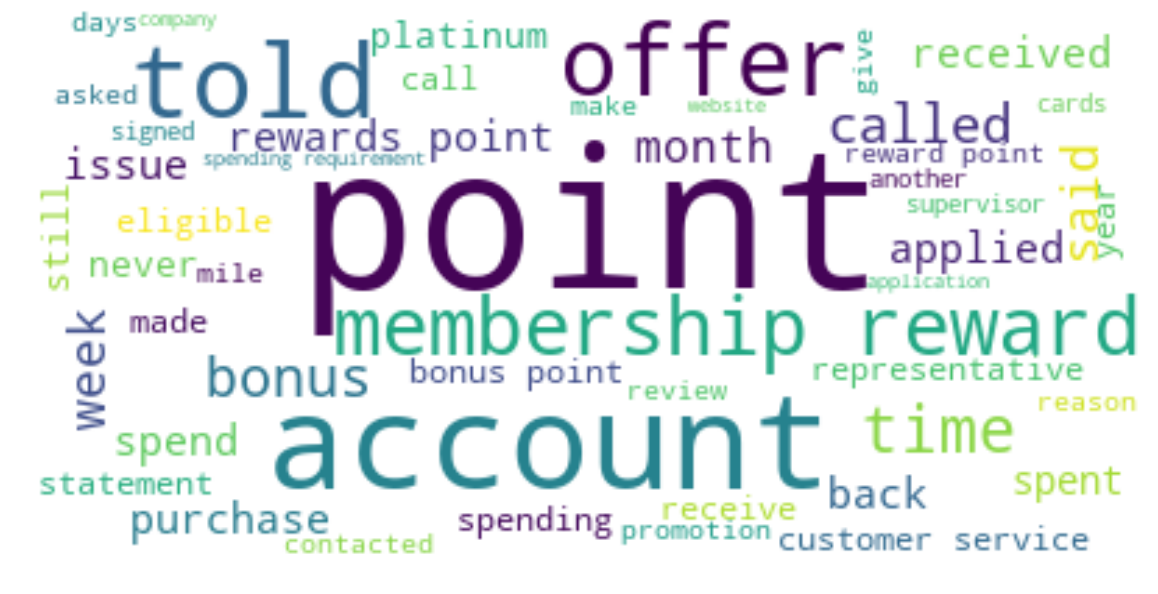

In [590]:
#Set graph size
rcParams['figure.figsize'] = 20,20

#Create wordcloud based on tokens and set graph params
wordcloud = WordCloud(max_font_size=70, max_words=50, background_color="white", relative_scaling=1).generate(" ".join(clean_tokens))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

#Save fig and show graph
plt.savefig('Wordcloud v2.png')
plt.show()


In [608]:
#Stream reward df to AMEX entries only for ANY complaint type - not just rewards
amex_df = df[df['Company']=='Amex']

#Get complaints from all text, ignore the first value (NaN) and join
text = amex_df['Consumer complaint narrative'].unique()
text = list(text)[1:]
corpus = " ".join(text)

#Lowercase all text and tokenize using nltk regex for words of four letters or more only
corpus = corpus.lower()
tokenizer = RegexpTokenizer(r'[a-zA-Z][a-zA-Z][a-zA-Z][a-zA-Z]+')
tokens = tokenizer.tokenize(corpus)

#Remove stop words from token set
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

#Remove specific problem words from token set
remove_word = ['xxxx', "amex", "express", "american", 'card', 'credit']
for token in tokens:
    if token in remove_word:
        clean_tokens.remove(token)
        
#Create a frequency dictionary of word entries
freq = nltk.FreqDist(clean_tokens)

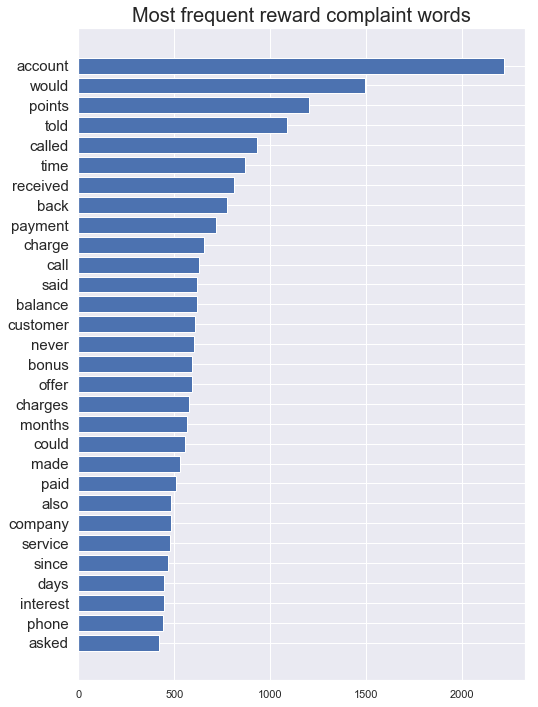

In [609]:
#Create a datafram of freqdist entries to sort and take the top 30 values ONLY
freq_dist = pd.DataFrame([freq.keys(), freq.values()]).T
indexes = list(freq_dist[1].sort_values(ascending=False).index)
freq_dist = freq_dist.loc[indexes][:30]

#Split into object, values and y-positions for creating a graph
objects = list(freq_dist[0].values)
values = list(freq_dist[1].values)
y = range(len(objects))

#Set graph size
rcParams['figure.figsize'] = 8,12

#Plot and set graph params
plt.barh(y, values[::-1])
plt.yticks(y, objects[::-1], size = 15)
plt.title('Most frequent reward complaint words', size=20)

#Save and display fig
plt.savefig('Most frequent any complaint words for AMEX v2.png')
plt.show()
plt.show()

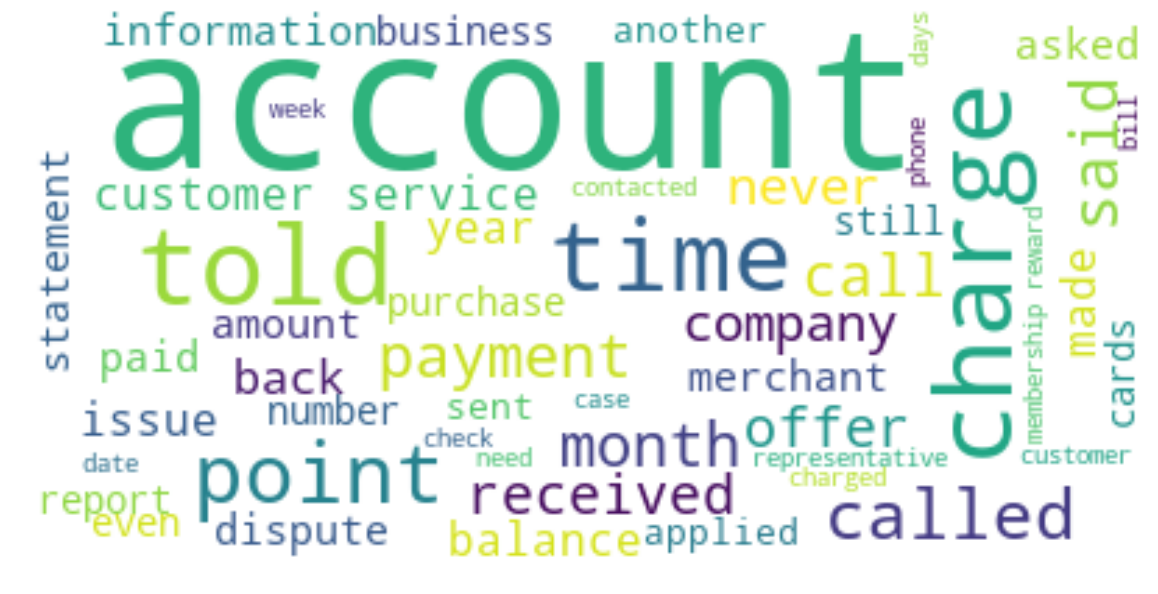

In [612]:
from wordcloud import WordCloud

rcParams['figure.figsize'] = 20,20

wordcloud = WordCloud(max_font_size=70, max_words=50, background_color="white", relative_scaling=1).generate(" ".join(clean_tokens))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# plt.title('Wordcloud for reward based complaints', size=30)

plt.savefig('Wordcloud v2_all_AMEX complaints.png')
plt.show()